#  Исследование рынка видеоигр

**Заказчик** - интернет-магазин "Стримчик".

**Задача** - проанализировать данные и проверить некоторые гипотезы для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные и видео- игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы**:
1. Загрузка и описание данных
2. Предобработка данных
3. Исследовательский анализ данных:
- Рассмотрим сколько игр выпускалось в разные годы
- Рассмотрим  как менялись продажи по платформам, характерный срок жизни платформ
- Определим актуальный период для прогноза на 2017-й год
- Рассмотрим продажи по платформам и определим потенциально выгодные
- Оценим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, а также на актуальных
- Посмотрим на общее распределение игр по жанрам. Выделяются ли жанры с высокими и низкими продажами
4. Составим "портрет пользователя" по крупным регионам (NA, EU, JP)
- топ-5 платформ
- топ-5 жанров
- рассмотрим влияние рейтинга на на продажи по регионам
5. Проверка гипотез
6. ВЫВОД


## Загрузка и описание данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
print(data.duplicated().sum())
print()
print(data.isna().sum())

0

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [4]:
data[data[['Name', 'Platform', 'Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Итак, у нас 16715 записей со следующей информацией:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Явных дубликатов нет, есть пара неявных (один из которых - пропущенное значение - поэтому 1 неявный дубликат мы можем игнорировать). Имеются пропуски в **названиях**, **годах выпуска**, **оценках критиков** и **пользователей** и **рейтинге**.

Для удобства работы нам необходимо:
- привести названия столбцов к "змеиному" регистру
- обработать пропуски
- преобразовать типы данных к нужным
- создать столбец с суммарными продажами

## Предобработка данных

In [5]:
data.columns = [x.lower() for x in data.columns.values]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее разберем пропуски, начнём с названий:

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 строки, при этом пропуски также и в других параметрах. Т.к. без названия мы не можем оценивать игры, то смело удалим. Следующий **год выпуска** - всего 269 пропусков - на разных платформах игры могут выходить как в один год, так и с разницей больше года (иногда сильно больше), а также под одним названием погут быть разные проекты. Искать для каждой информацию слишком затратно по ресурсам времени, а удаление 1,61% данных не повлияет сильно на результат, так что тоже удалим.

In [7]:
data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)
data = data.reset_index(drop=True)

В **оценках критиков** и **пользователей** и **рейтинге** посмотрим на уникальные значения и изучим их:

In [8]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [9]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- **Оценки критиков** - целые значения (по условиям от 0 до 100)
- **Оценки пользователей** - дробные значения (от 0 до 10), пропуски и "tbd". Если верить GameRanks, TBD – это аббревиатура, которая означает фразу “To Be Determined” - может использоваться для описания ситуаций, где окончательное решение еще не принято, но появится в будущем, то есть не рассчитано или не определено.

In [11]:
len(data[data['user_score'] == 'tbd'])

2376

Чисто технически - это тоже пропуск, поэтому заменим его также на пропуски.

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

**Рейтинг** - пропуски и буквенные обозначения системы ESRB:
- E - («Everyone») — «Для всех»
- M - («Mature») — «Для взрослых» (17+)
- T - («Teen») — «Подросткам» (13+)
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- K-A - ("Kids to Adults") - старое обозначение Е (можем заменить для удобства)
- AO - («Adults Only 18+») — «Только для взрослых» (18+)
- EC - («Early childhood») — «Для детей младшего возраста»
- RP - («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга

Посмотрим сколько пропусков у нас отсталось после прошлых манипуляций, заодно проверим как раз последнее значение - как много игр, ожидающих рейтинг, и как давно они его ожидают.

In [13]:
data['rating'].isna().sum()

6676

In [14]:
data[data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14045,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Всего 1 игра, ожидающая рейтинг больше 5 лет - а ведь эта категория нам прекрасно подходит для пропусков. Рейтинг отражает не то, для какого рынка выпущена игра, а то оценила ли её комиссия (и как) или нет. Игры могут выходить как для конкретного рынка, так и на разных - причём с запазданием на некоторых. Т.к. у нас нет оценок других рейтинговых агенств - работаем только с ESRB. Ну и категорию "К-А" тоже осовременим: 

In [15]:
data['rating'] = data['rating'].fillna(value='RP')
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].isna().sum()

0

Оставшиеся пропуски в рейтингах критиков и пользователей оставим без изменений. Они могут быть связаны с тем, что игры могли:
- выходить только на локальных рынках
- выходить в года, когда игровая журналистика только зарождалась и по этой причине не иметь оценок
- быть "инди" - проектами, которые не оцениваются критиками
- не удостоиться внимания со стороны тех или иных оценок
- долгое время находиться в стадии "раннего доступа" - готового продукта нет, оценка может быть некорректна
- потерять свою аудиторию, выйдя слишком поздно и пр.

Теперь поменяем типы данных у
- **года выпуска** - у нас от с плавающей точкой, сделаем целочисленный
- **оценка пользователей** - текстовое обозначение к дробным:

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)

Создаём столбец с **суммарными продажами**:

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
print(data.info())
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


**ПЕРВЫЕ ВЫВОДЫ**
- Размер датафрейма уменьшился до 16444 строк (на 1,62%)
- Названия столбцов приведены к "змеиному" регистру
- Там, где это возможно, обработаны пропуски
- Там, где необходимо, заменен тип данных (год не может быть дробным, поэтому заменён на целочисленный, оценка пользователя заменена на дробное из текстового для рассчётов)
- Добавлен столбец с суммарным объёмом продаж

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

Посмотрим, какой период мы рассматриваем, и сколько игр выпущено в каждом году:

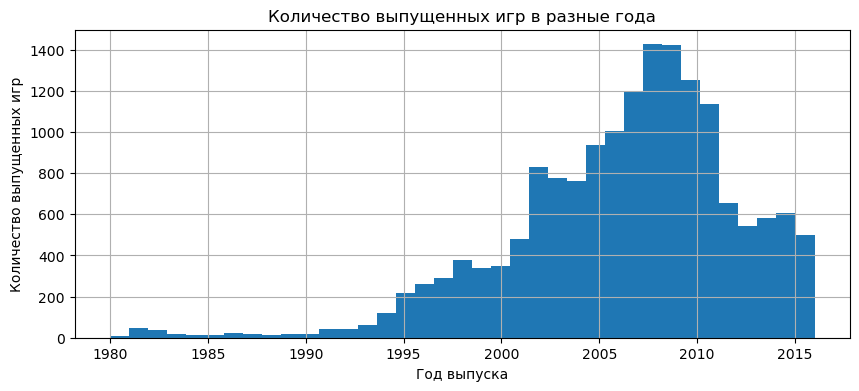

In [18]:
data['year_of_release'].hist(bins=37, figsize = (10, 4))
plt.ylabel('Количество выпущенных игр')
plt.xlabel('Год выпуска')
plt.title('Количество выпущенных игр в разные года');

В 1980-х рынок игровых консолей только зарождался, поэтому и количество игр было минимальным, с 1990-х массовое распространение стали получать не только консоли, но и домашние ПК - соответственно наметился и рост. Настоящий рассвет видеоигр произошёл уже в 2000-х - с развитием консолей и ПК появилось и больше игровых студий и самих консолей - и игр на них. А с 2012-го наметилось резкое падение - возможно из-за массового развития смартфонов.

### Рассмотрим как менялись продажи по платформам, характерный срок жизни платформ

31


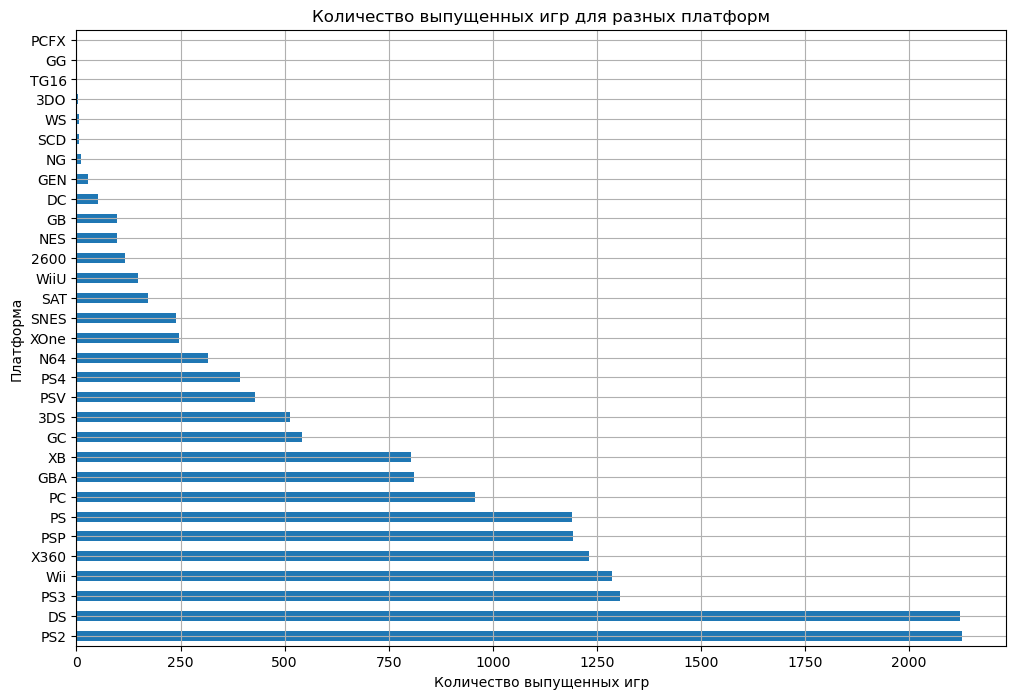

In [19]:
print(len(data['platform'].unique()))
data['platform'].value_counts().plot(kind = 'barh', figsize=(12, 8));
plt.grid()
plt.xlabel('Количество выпущенных игр')
plt.ylabel('Платформа')
plt.title('Количество выпущенных игр для разных платформ');

Абсолютными рекордсменами по количеству вышедших игр являются PlayStation 2 и Nintendo DS. В "хвосте" - те, кто не получил своего развития из-за малого распространения или плохого маркетинга (например, провальная 3DO и GameGear). Посмотрим, что по продажам. Для этого возьмём топ-15 по годам c cамым большим количеством игр (если верить нашим графикам - с 2002 по по 2016):

In [20]:
best_sellers = data.groupby('year_of_release')['total_sales'].count().sort_values(ascending=False).head(15)
best_sellers

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: total_sales, dtype: int64

In [21]:
data_best_sellers = data.query('year_of_release in @best_sellers.index')
data_best_sellers = data_best_sellers.reset_index(drop=True)
print(data_best_sellers.info())
data_best_sellers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13638 entries, 0 to 13637
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             13638 non-null  object 
 1   platform         13638 non-null  object 
 2   year_of_release  13638 non-null  int32  
 3   genre            13638 non-null  object 
 4   na_sales         13638 non-null  float64
 5   eu_sales         13638 non-null  float64
 6   jp_sales         13638 non-null  float64
 7   other_sales      13638 non-null  float64
 8   critic_score     7418 non-null   float64
 9   user_score       7007 non-null   float64
 10  rating           13638 non-null  object 
 11  total_sales      13638 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.2+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,RP,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [22]:
ts_type = data_best_sellers.pivot_table(index='platform', values='total_sales', aggfunc='sum', columns='year_of_release')
ts_type

year_of_release,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN


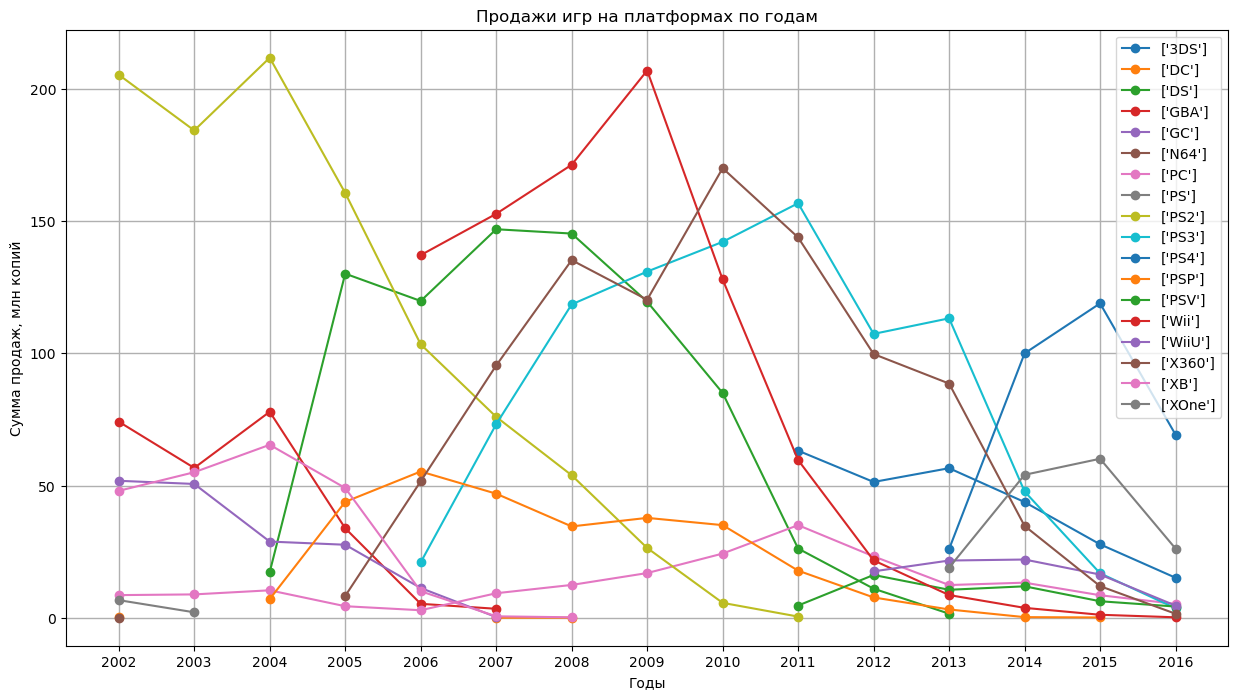

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
for i in ts_type.index:
    ax.plot(ts_type.columns, ts_type.loc[i], marker ='o', label=[i])
plt.xticks(ts_type.columns)
plt.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=1)
plt.xlabel('Годы')
plt.ylabel('Сумма продаж, млн копий')
plt.title('Продажи игр на платформах по годам');

In [24]:
len(data_best_sellers['platform'].unique())

18

18 платформ на 15 лет, часть из которых уже завершила свой цикл - не совсем актуальные данные. Попробуем выделить топ-10 платформ за этот период:

In [25]:
best_platform = data_best_sellers.groupby('platform')['total_sales'].count().sort_values(ascending=False).head(10)
best_platform

platform
DS      2120
PS2     1860
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       895
XB       769
GBA      703
GC       520
Name: total_sales, dtype: int64

In [26]:
top10_sellers = data_best_sellers.query('platform in @best_platform.index')
top10_sellers = top10_sellers.reset_index(drop=True)
print(top10_sellers.info())
top10_sellers.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11884 entries, 0 to 11883
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             11884 non-null  object 
 1   platform         11884 non-null  object 
 2   year_of_release  11884 non-null  int32  
 3   genre            11884 non-null  object 
 4   na_sales         11884 non-null  float64
 5   eu_sales         11884 non-null  float64
 6   jp_sales         11884 non-null  float64
 7   other_sales      11884 non-null  float64
 8   critic_score     6621 non-null   float64
 9   user_score       6152 non-null   float64
 10  rating           11884 non-null  object 
 11  total_sales      11884 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.0+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,RP,24.67
7,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [27]:
ts_top10 = top10_sellers.pivot_table(index='platform', values='total_sales', aggfunc='sum', columns='year_of_release')
ts_top10

year_of_release,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,
DS,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
PSP,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
Wii,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


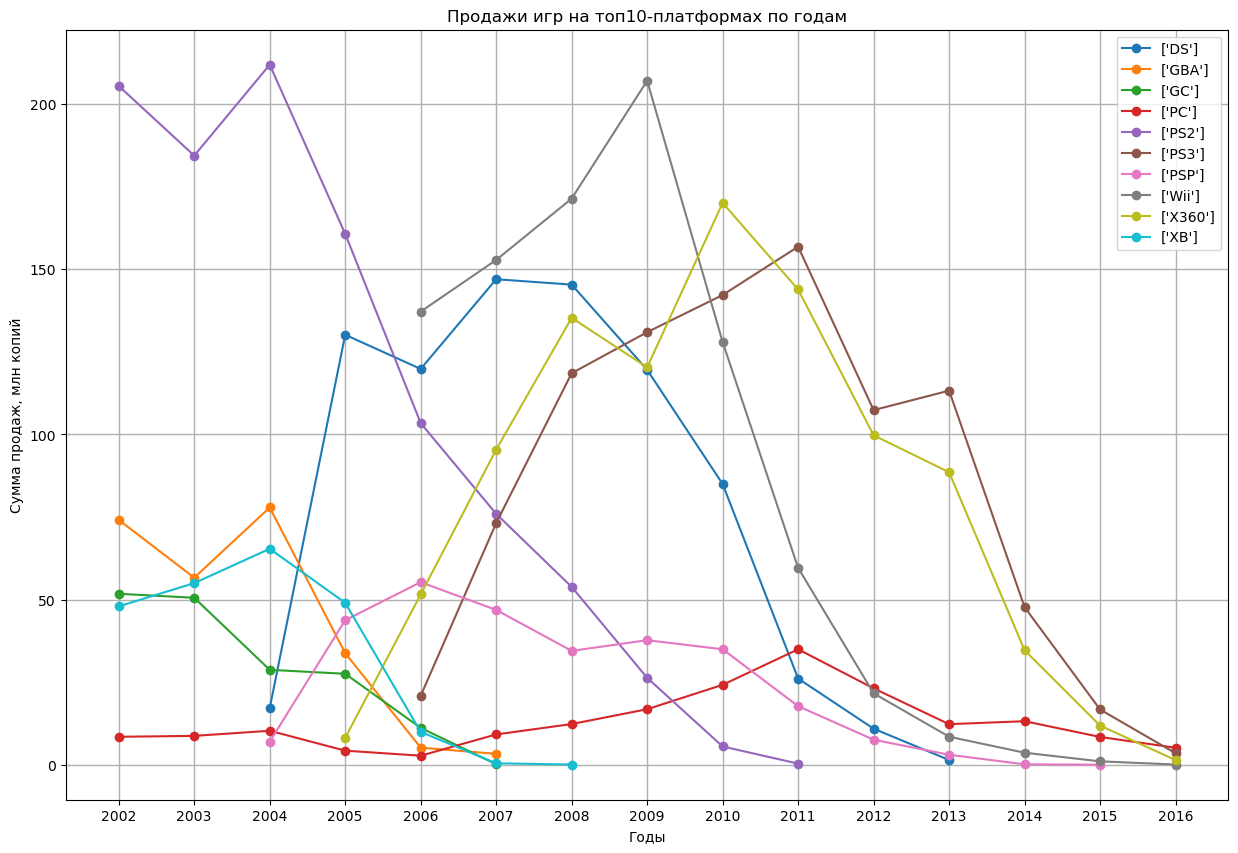

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in ts_top10.index:
    ax.plot(ts_top10.columns, ts_top10.loc[i], marker ='o', label=[i])
plt.xticks(ts_top10.columns)
plt.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=1)
plt.xlabel('Годы')
plt.ylabel('Сумма продаж, млн копий')
plt.title('Продажи игр на топ10-платформах по годам');

С одной стороны, мы получили более "очищенный топ" - самые большие продажи на топ-10 консолей за последние 15 лет. Но судить о перспективности платформ стоит на сравнении этих 2 графиков - т.к. они, помимо количества продаж, отображают и сроки жизни платформ. Например, абсолютный рекордсмен всех времён - PlayStation2, вышедшая в 2000-м - не получает игры с 2011 года, а вышедшая в 2006-м Nintendo Wii обгоняет его по продажам с самого своего старта. При этом, их обоих с 2010 года "обгоняют" и XBox360 и PlayStation 3, вышедшие в 2005 и 2006 годах, соответственно. На последнем графике мы видим, что срок жизни всех топ-10 к 2016 году или уже завершился или завершается (кроме РС - платформа, которая только обновляется).

Но, что мы можем увидеть на предыдущем графике, в отличие от этого - это начало новых поколений, в частности: портативные PlayStation Vita и Nintendo 3DS (2011 год), Nintendo WiiU (2012 год), PlayStation 4 и ХBoxOne (2013 год) - которые со старта обгоняют РС, а 2 последние с 2014 года (через год после выхода) - занимают топ-2 среди всех платформ, а безоговорочный лидер - PS4.

Как мы видим, снижение к 2016 году есть абсолютно у всех, но это, скороее всего, можно объяснить тем, что по условию задачи, мы рассматриваем данные в декабре 2016 - то есть еще не все данные посчитаны и полную отчётность мы увидим лишь в 1 квартале 2017 года. Нам необходимо понять, какой средний срок жизни есть у платформ, чтобы узнать - какие имеют перспективу. Сроком жизни будем считать разницу между годами выпуска первой и последней игры + 1 год. Т.к. на рынок как платформы, так и игры выходят не 1 января.

In [29]:
life_time = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
life_time.columns = ['platform', 'first_year', 'last_year']
life_time['life'] = life_time['last_year'] - life_time['first_year'] + 1
print(life_time['life'].describe())
life_time

count    31.000000
mean      8.612903
std       6.998464
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      32.000000
Name: life, dtype: float64


,platform,first_year,last_year,life
0,2600,1980,1989,10
1,3DO,1994,1995,2
2,3DS,2011,2016,6
3,DC,1998,2008,11
4,DS,1985,2013,29
5,GB,1988,2001,14
6,GBA,2000,2007,8
7,GC,2001,2007,7
8,GEN,1990,1994,5
9,GG,1992,1992,1


Средняя продолжительность жизни - 8,6 лет, медианная 7. Хотя, мы видим, что есть и те, кто просуществовал на игровом рынке 1 год, а ПК, например 32 года. Судя по графикам выше, у большинства платформ есть определённый паттерн - пиковые продажи происходят ближе к середине жизни, а ближе к концу - продажи падают. К тому же, у больших игроков новое поколение выходит еще "при жизни" предыдущего. Это происходит потому, что на разработку игр тоже нужно время - выпускать на рынок консоль без игр нет никакого смысла.

### Определим актуальный период для прогноза на 2017-й год

Нас точно не интересуют консоли, которые уже закончили свой жизненный цикл. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные и видео- игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит. Посмотрим кто выходил за последние 4 года:

In [30]:
life_time.query('first_year >= 2012')

,platform,first_year,last_year,life
18,PS4,2013,2016,4
27,WiiU,2012,2016,5
30,XOne,2013,2016,4


Сразу у 3 крупных игроков мира видеоигр есть новые поколения консолей. Как мы знаем из официальных релизов - PS4 и XBoxOne вышли в ноябре 2013, а на старте у всех лишь небольшой пул игр. Нас интересует прогноз на 2017-й год, значит рассматривать будем тренды последних 3 лет:

In [31]:
data_actual = data.query('year_of_release > 2013')
data_actual = data_actual.reset_index(drop=True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


### Рассмотрим продажи по платформам и определим потенциально выгодные

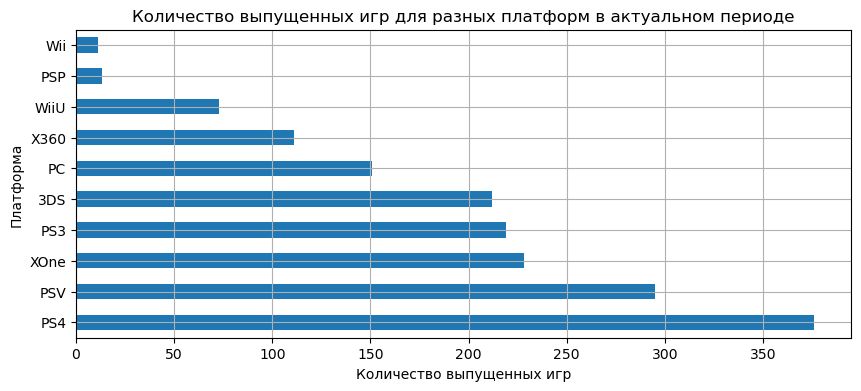

In [32]:
data_actual['platform'].value_counts().plot(kind = 'barh', figsize=(10, 4));
plt.grid()
plt.xlabel('Количество выпущенных игр')
plt.ylabel('Платформа')
plt.title('Количество выпущенных игр для разных платформ в актуальном периоде');

In [33]:
act_sales = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
act_sales.sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Лидером по количеству выпущенных игр и прибыли является PS4, а вот PSV, занимающая 2 место по количеству игр, по продажам занимает 8-е, перспективы в ней практически нет. На второе места в приоритетах продаж, естественно, ставим XOne. На третье - 3DS - консоль вышла в 2011-м и приносит хорошую прибыль. PS3, X360 и Wii - опасны на перспективу - консолям уже больше 10-и лет, а в  нашем 2016 году были представлены PS4 Pro и Xbox One S - значит, игровые студии, уже готовят релизы под новое поколение. Поэтому четвёртое место можно отдать WiiU - актуальной консоли Nintendo. Пятёрку лидеров займёт ПК - вечная платформа.

Построим диаграмму размаха ("ящик с усами") по глобальным продажам игр в разбивке по платформам:

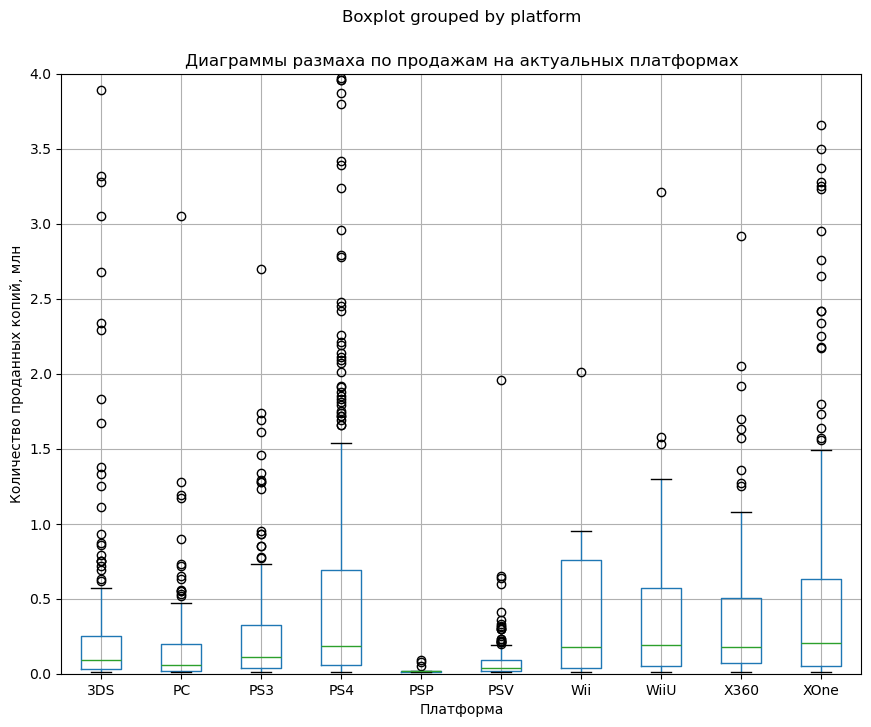

In [34]:
data_actual.boxplot(column='total_sales', by='platform', figsize=(10, 8))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 4);

Посмотрим в цифрах:

In [35]:
actual_agg = data_actual.pivot_table(index='platform', values='total_sales', aggfunc=['count','sum', 'mean', 'median','std'])
actual_agg

,count,sum,mean,median,std
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
3DS,212,86.68,0.408868,0.090,1.188368
PC,151,27.05,0.179139,0.060,0.329359
PS3,219,68.18,0.311324,0.110,0.633059
PS4,376,288.15,0.766356,0.185,1.614969
PSP,13,0.36,0.027692,0.020,0.027735
PSV,295,22.40,0.075932,0.040,0.141591
Wii,11,5.07,0.460909,0.180,0.625451
WiiU,73,42.98,0.588767,0.190,1.161467


Ожидаемо, лидером продаж среди всех является PlayStation 4 - больше по количеству, сумме, среднему, но и размах у нее самый большой (если вспомнить график из предыдущих рассчётов, за первый год рост в 4 раза, и дальше продолжила расти). На втором месте - главный конкурент XBox One - при вдвое меньших продажах почти такой же "ящик", чуть ниже средняя, чуть выше медианная, а вот размах ниже (он хоть тоже вырос со второго года, но не так сильно, как Sony). На третьем месте Nintendo - что объяснимо исторически: она одновременно работает как с рынком домашних консолей (WiiU имеет хорошую среднюю и медианную), так и с портативным (у 3DS весьма неплохие количества и суммы продаж). Кстати, у всех размахи можно объяснить наличием эксклюзивов, зачастую и "продающих консоль".

Ситуацию с ПК - самой стабильной платформой - можно объяснить наличием самой развитой индустрии "пиратства", а также большим количеством низких цен. А вот явный аутсайдеры - PSP и Vita: самые маленькие "ящики" и самые короткие "усы" - самые низкие средние, медианные и выбросы. Одно из самых больших количество продаж и при этом самая низкая сумма у Vita. А, если верить предыдущим рассчётам - с момента своего появления ни разу не добиралась даже до продаж игр на ПК. А PSP так и вообще завершила жизненный цикл в 2015-м году.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
Для этого начнём рассмотрение с самой актуальной платформы - PS4. Для этого проверим корреляцию между оценками и продажами:

In [36]:
data_ps4 = data_actual.query('platform == "PS4"')
data_ps4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Связь между продажами как во всех регионах вместе, так и по-отдельности с оценками критиков ниже средней, с оценками пользователей - практически отсутствует. Лишь малая часть японских пользователей обращает внимание на оценки других пользователей. Посмотрим на диаграммы рассеяния для обеих оценок:

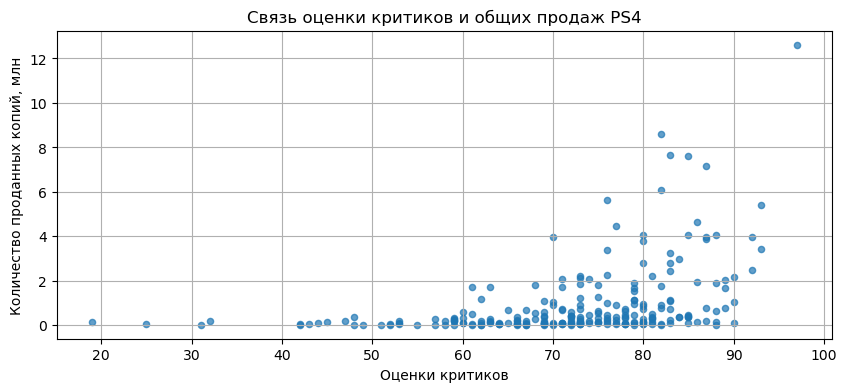

In [37]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки критиков')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки критиков и общих продаж PS4');

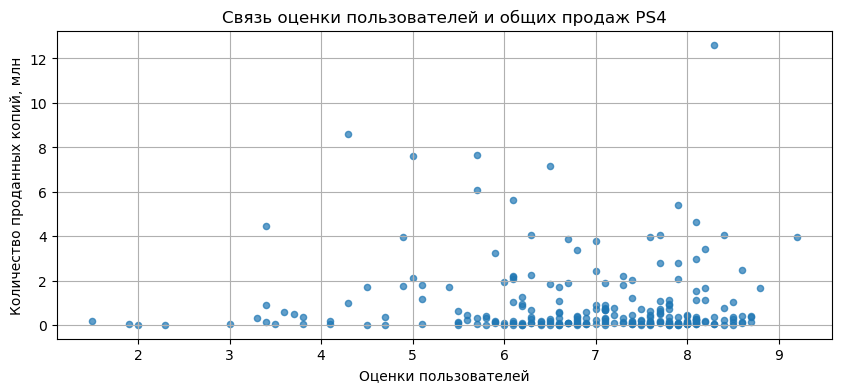

In [38]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки пользователей и общих продаж PS4');

Графики подтверждают цифры - прямых зависимостей нет, продажи от оценок критиков зависят больше от оценок критиков, чем пользователей, но и не сказать, что сильно. Если на диаграмме **пользователей** выбросов предостаточно, то у **критиков** их куда меньше. Опять же, PlayStation 4 - наследница самых популярных консолей производителя, совершившего революцию на рынке видеоигровых решений ни один раз - продаёт сама себя и за счёт большого числа эксклюзивов. После рассмотрения актуальных консолей мы посмотрим и на самую популярную на планете PlayStation 2, а пока перейдём к XBox One:

In [39]:
data_xone = data_actual.query('platform == "XOne"')
data_xone[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


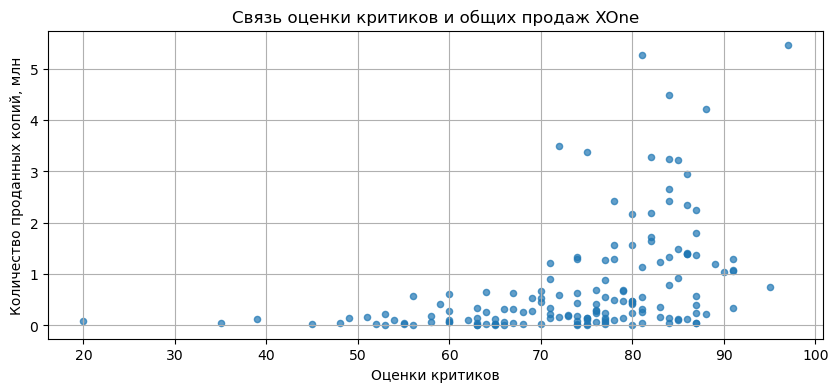

In [40]:
data_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки критиков')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки критиков и общих продаж XOne');

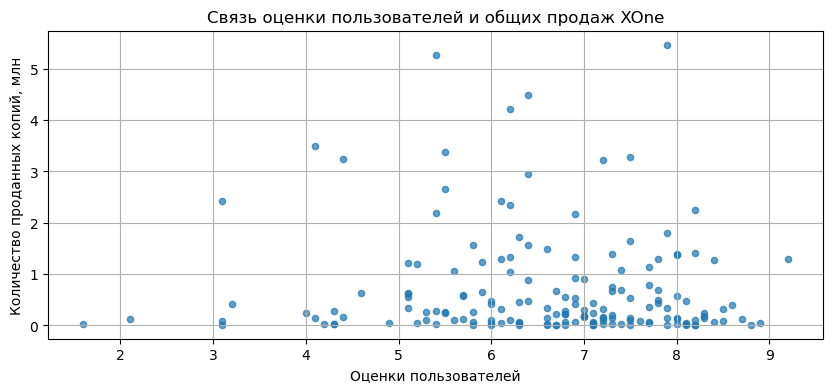

In [41]:
data_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки пользователей и общих продаж XOne');

У консоли от Майкрософт дела обстоят очень похоже - связь между оценкой критиков и продажами слабая, а с оценкой пользователей также почти отсутствует. Рассеяние на диаграмме критиков чуть большее, чем у Sony, что также объяснимо эксклюзивами или продолжениями популярных игр, хотя до того же уровня продаж ей далеко. Что там у большой N - посмотрим на WiiU:

In [42]:
data_wiiu = data_actual.query('platform == "WiiU"')
data_wiiu[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


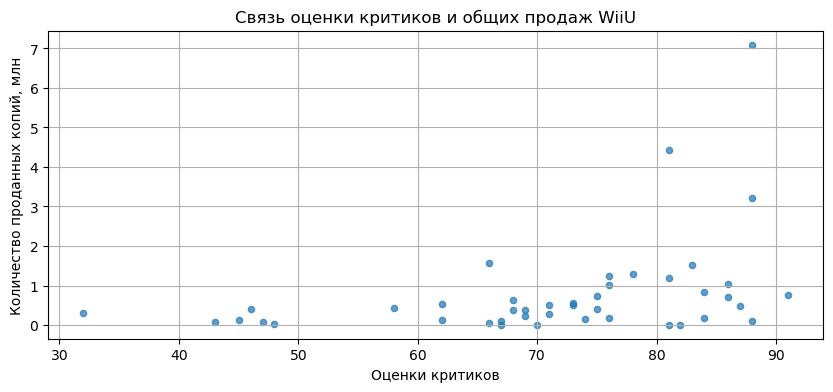

In [43]:
data_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки критиков')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки критиков и общих продаж WiiU');

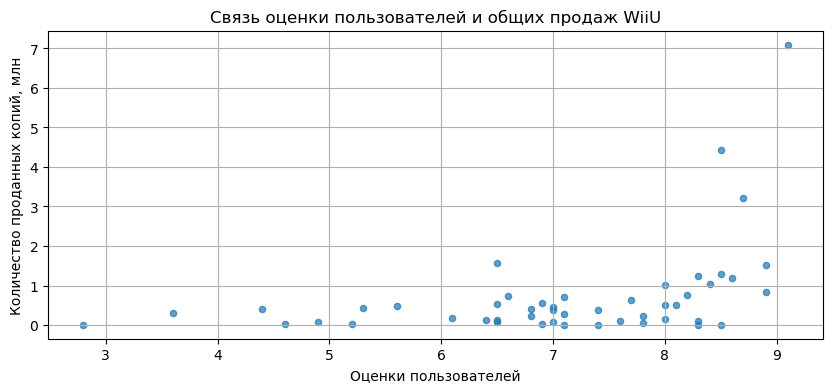

In [44]:
data_wiiu.plot(x='user_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки пользователей и общих продаж WiiU');

Домашняя консоль от Nintendo по части связи продаж и оценок критиков близка к предыдущим, а вот с пользователями - куда лучше: если в рассмотренных выше связь отсутствовала, то здесь чуть ниже средней. Nintendo всегда стояла особняком среди других консолей - у самурая "свой путь", поэтому и рассеяние меньше - её любят не только за эксклюзивы. Смотрим на портативки - начнём с той же нинтендовской 3DS:

In [45]:
data_3ds = data_actual.query('platform == "3DS"')
data_3ds[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


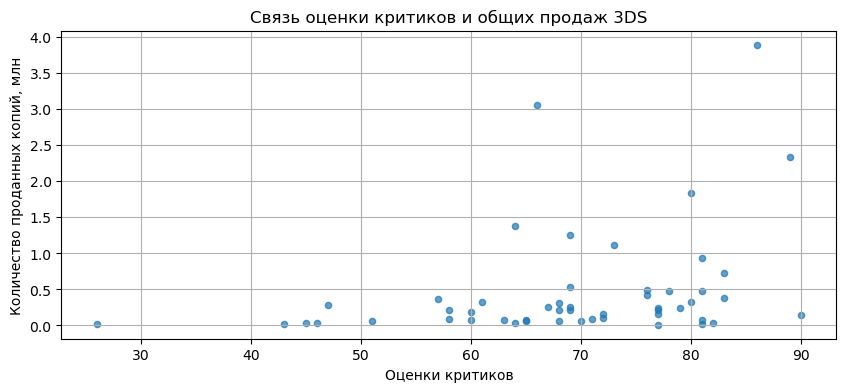

In [46]:
data_3ds.plot(x='critic_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки критиков')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки критиков и общих продаж 3DS');

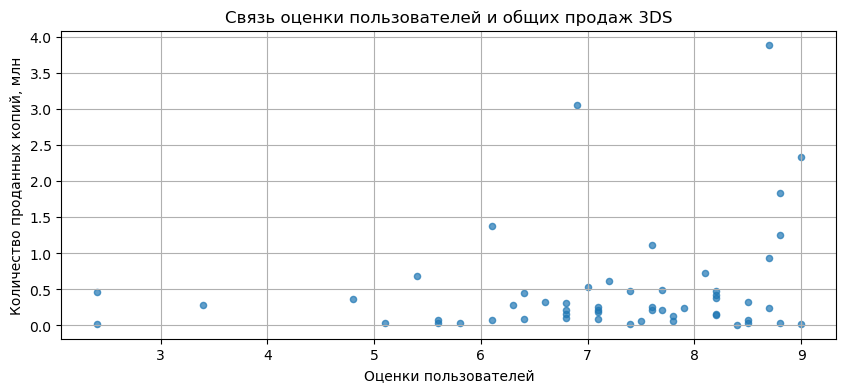

In [47]:
data_3ds.plot(x='user_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки пользователей и общих продаж 3DS');

У портативки от Nintendo связь с оценками как критиков так и пользователей слабая. Точек рассеяния ещё меньше - это можно объяснить именно спецификой - на портативках меньше хитов, больше эксклюзивов. И покупают их с другой целью - развлечь себя в дороге или в свободное время - это другой игровой опыт. Смотрим на ПК:

In [48]:
data_pc = data_actual.query('platform == "PC"')
data_pc[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.174634,-0.071597
critic_score,0.174634,1.000000,0.466099
user_score,-0.071597,0.466099,1.000000


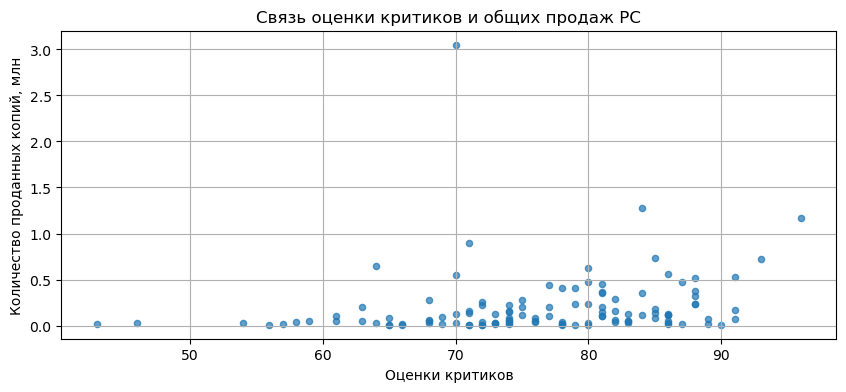

In [49]:
data_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки критиков')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки критиков и общих продаж PC');

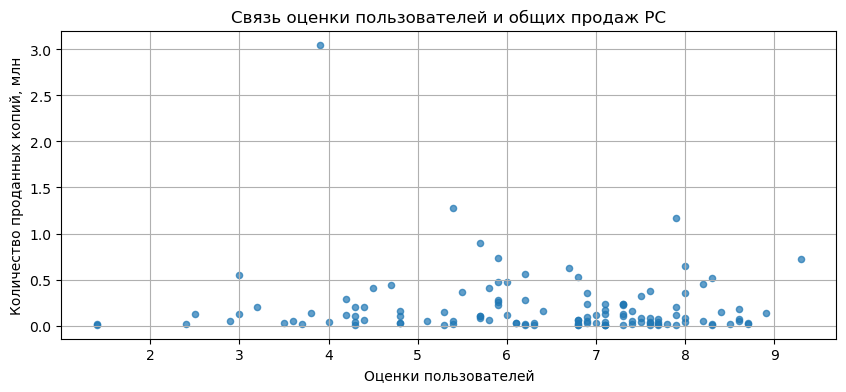

In [50]:
data_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha= 0.7, figsize=(10, 4), grid=True);
plt.xlabel('Оценки пользователей')
plt.ylabel('Количество проданных копий, млн')
plt.title('Связь оценки пользователей и общих продаж PC');

У ПК связь продаж с оценками критиков очень слабая, с оценками пользователей отсутствует. Связано это, скорее всего, с тем что ПК - самая продолжительная про сроку существования платформа и разнообразие как жанров, так и игр на ней очень велико. На заре геймдева игры продавались только потому, что были, а в современном мире они могут продаваться и спустя большой срок после выхода (ностальгия), и исправленные/дополненные версии (когда-то получившие плохие оценки).

**Общий вывод** для магазина "Стримчик" на основе исследований, связанных с оценками - стоит сосредоточиться на актуальных платформах: PS4, XOne, WiiU, портативной 3DS и, естесственно, PC - не обращая внимания на оценки пользователей, лишь иногда обращать на оценки критиков.

### Рассмотрим  распределение игр по жанрам

Посмотрим, сколько всего у нас есть жанров и на их распределение - нас интересуют прогнозы на будущее для нашего магазина, поэтому мы возьмём актуальные данные

12


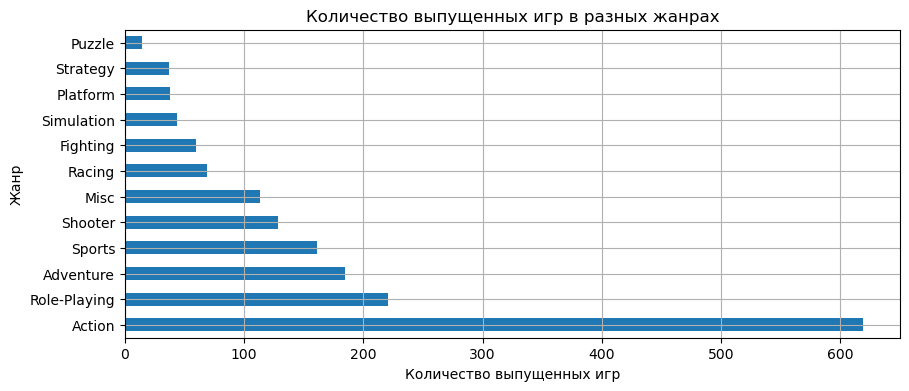

In [51]:
print(len(data_actual['genre'].unique()))
data_actual['genre'].value_counts().plot(kind = 'barh', figsize=(10, 4));
plt.grid()
plt.xlabel('Количество выпущенных игр')
plt.ylabel('Жанр')
plt.title('Количество выпущенных игр в разных жанрах');

На первом месте игры жанра "Экшен" - он довольно многообразен, на втором "ролёвки" или RPG, далее - "приключения", спортивные игры, "шутеры", на 6-м месте Misc - в переводе с английского "разное" - весьма интересный жанр... ну и далее: гонки, файтинги, симуляторы (чего, интересно?), платформеры, стратегии и пазлы. Одно дело - количество, нам интересна динамика:

In [52]:
genre_type = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum', columns='year_of_release')
genre_type

year_of_release,2014,2015,2016
genre,,,
Action,97.23,72.02,30.11
Adventure,5.57,8.16,3.82
Fighting,15.85,7.90,4.47
Misc,23.38,11.57,2.60
Platform,8.81,6.05,3.23
Puzzle,1.49,0.71,0.01
Racing,16.66,8.07,2.79
Role-Playing,45.62,37.64,18.18
Shooter,65.21,67.51,38.22


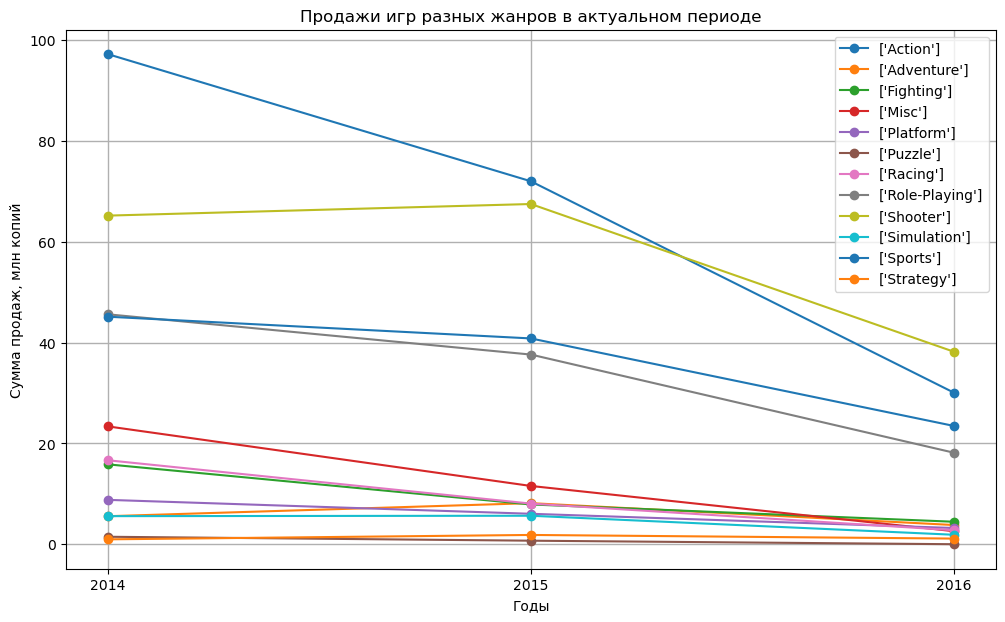

In [53]:
fig, ax = plt.subplots(figsize=(12, 7))
for i in genre_type.index:
    ax.plot(genre_type.columns, genre_type.loc[i], marker ='o', label=[i])
plt.xticks(genre_type.columns)
plt.legend(loc='upper right')
plt.grid(linestyle='-', linewidth=1)
plt.xlabel('Годы')
plt.ylabel('Сумма продаж, млн копий')
plt.title('Продажи игр разных жанров в актуальном периоде');

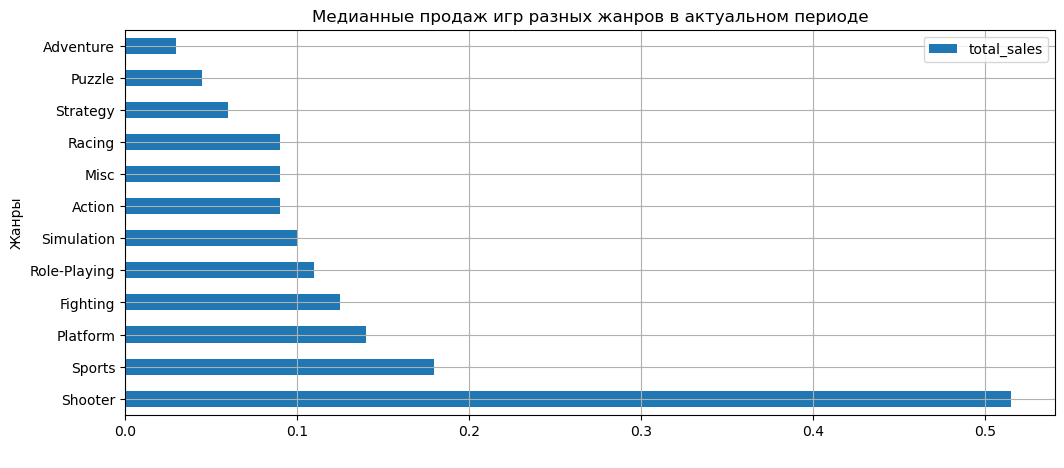

In [54]:
genre_median = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
genre_median.sort_values(by='total_sales', ascending=False).plot(kind='barh', figsize=(12, 5))
plt.grid()
plt.ylabel('Жанры')
plt.xlabel(' ')
plt.title('Медианные продаж игр разных жанров в актуальном периоде');

Даже с неполными данными за 2016 год у нас есть 4 фаворита по количеству проданных:
- Экшены - наш лидер продаж
- Шутеры
- Спортивные
- Ролевые

При этом самым стабильно продающимся жанром является шутер. Далее расположились:
- Спортивные
- Платформеры
- Файтинги
- Ролевики

А вот экшены "уехали" на 7 место. Значит, в этом жанре выходит много игр, периодически "выстреливают" хиты, а вот со стабильностью есть проблемы. Мы можем попасть в ловушку дальше - рассчитывая предпочтения по платформам, которые уже не актуальны или стремительно теряют актуальность (PS3, X360, PSP, Wii, PSV) - нам ведь так нужно знать предпочтения по платформам, продавать игры для которых мы не будем. Это называется "ошибкой техасского стрелка".

## Составим портрет пользователя каждого региона

Регионов у нас выделено 4, но 4-й - сборный с разных малых регионов, а первые 3 - самые большие:
- NA - североамериканский
- EU - европейский
- JP - японский

Нам необходимо определить для пользователя каждого региона:
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

В нашем актуальном датасете, как мы выяснили, присутствуют 10 платформ (PS4, 3DS, XOne, WiiU, PS3, X360, PC, Wii, PSV, PSP). 
Из расчётов выше мы знаем, что 5 из них (PS4, 3DS, XOne, WiiU, PSV) - самые актуальные по сроку жизни, PC - "вечная", трём уже больше 10 лет (PS3, X360 и Wii), а PSP завершила свой жизненный цикл в прошлом году. Мы помним, что Vita - практически "мертворождённая" платформа - при большом количестве вышедших игр по продажам занимает 8-е место и с момента появления не дотягивается даже до ПК.

Нашему же интернет-магазину "Стримчик" важна прибыль в 2017 году, поэтому мы посмотрим на портрет пользователей как в разрезе общих продаж, так и в рамках 5 актуальных платформ:

In [55]:
actual_platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
data_str = data_actual.query('platform in @actual_platform').reset_index(drop=True)
data_str.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


Для начала сравним суммы продаж:

In [56]:
print('Продажи в Северной Америке ', data_actual['na_sales'].sum().round(2))
print('Продажи в Европе ', data_actual['eu_sales'].sum().round(2))
print('Продажи в Японии ', data_actual['jp_sales'].sum().round(2))
print()
print('Продажи в Северной Америке на актуальных платформах', data_str['na_sales'].sum().round(2))
print('Продажи в Европе на актуальных платформах', data_str['eu_sales'].sum().round(2))
print('Продажи в Японии на актуальных платформах', data_str['jp_sales'].sum().round(2))

Продажи в Северной Америке  284.06
Продажи в Европе  270.68
Продажи в Японии  93.09

Продажи в Северной Америке на актуальных платформах 229.11
Продажи в Европе на актуальных платформах 223.53
Продажи в Японии на актуальных платформах 66.89


### Топ-5 платформ в каждом регионе
Начнём с **североамериканского** региона:

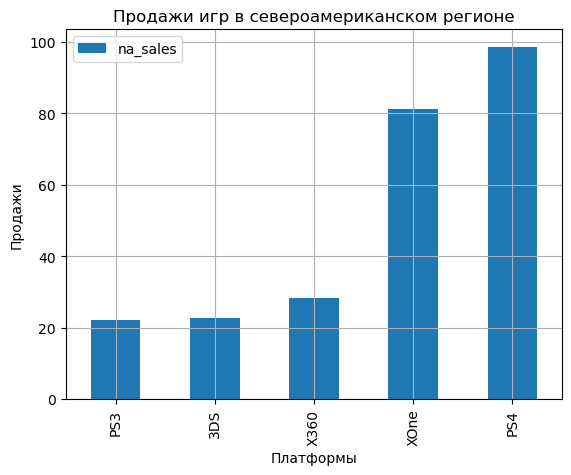

In [57]:
na_platform_type = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales').tail()
na_platform_type.plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в североамериканском регионе');

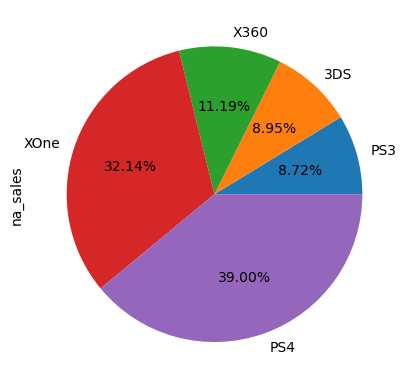

In [58]:
na_platform_type['na_sales'].plot.pie(autopct='%1.2f%%');

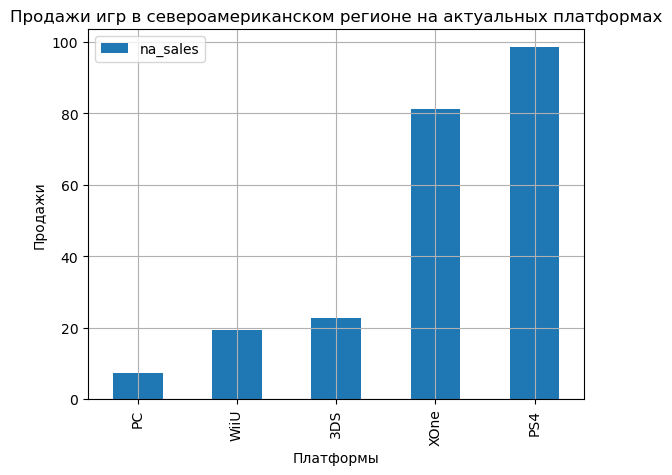

In [59]:
na_platform_type_str = data_str.pivot_table(index='platform', values='na_sales', aggfunc='sum')
na_platform_type_str.sort_values(by='na_sales').plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в североамериканском регионе на актуальных платформах');

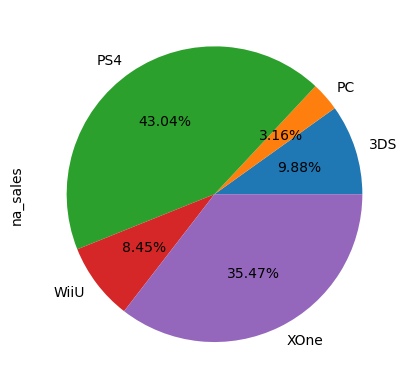

In [60]:
na_platform_type_str['na_sales'].plot.pie(autopct='%1.2f%%');

На североамериканском рынке предпочтение отдают консолям, в основном - новым: лидирует PS4, на втором месте XOne, далее X360, портативная Nintendo 3DS и замыкает топ-5 PS3. А если рассмотреть актуальные платформы: то порядок такой: PS4, XOne, 3DS, WiiU, PC.

На **европейском** регионе картина следующая:

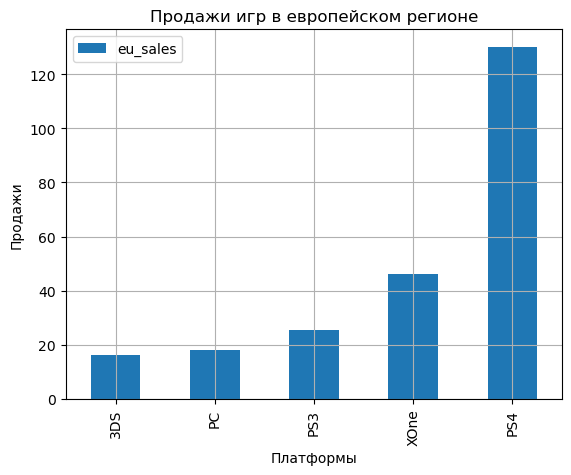

In [61]:
eu_platform_type = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales').tail()
eu_platform_type.plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в европейском регионе');

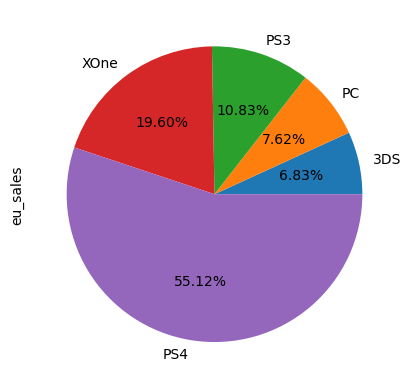

In [62]:
eu_platform_type['eu_sales'].plot.pie(autopct='%1.2f%%');

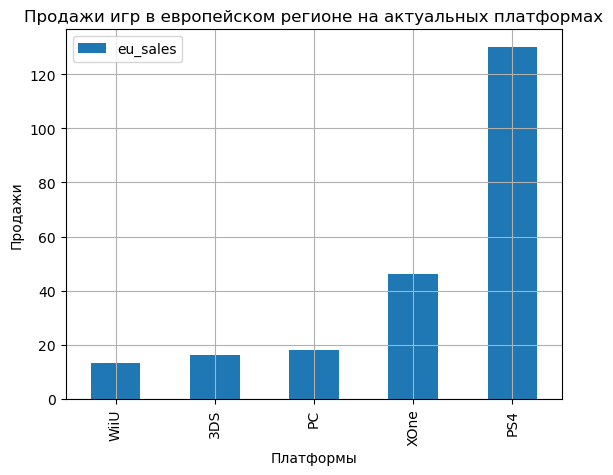

In [63]:
eu_platform_type_str = data_str.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_platform_type_str.sort_values(by='eu_sales').plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в европейском регионе на актуальных платформах');

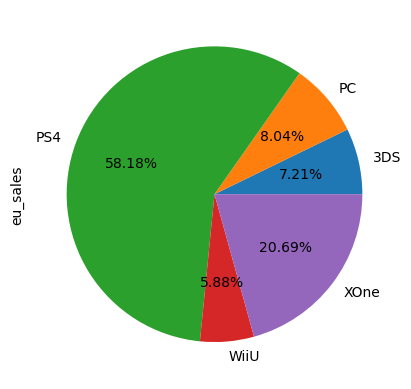

In [64]:
eu_platform_type_str['eu_sales'].plot.pie(autopct='%1.2f%%');

Европейцы также на первое место ставят новую PS4, она занимает больше половины рынка, XOne уступает ей в 2,8 раза, далее PS3, РС и 3DS. Среди актуальных платформ порядок такой: PS4, XOne, PC, 3DS, WiiU.

**Японский** регион:

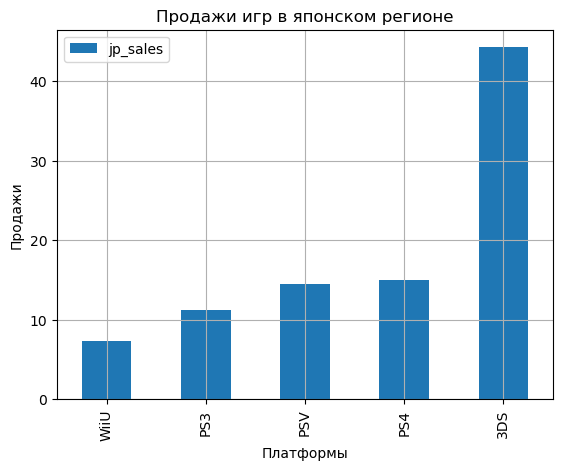

In [65]:
jp_platform_type = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales').tail()
jp_platform_type.plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в японском регионе');

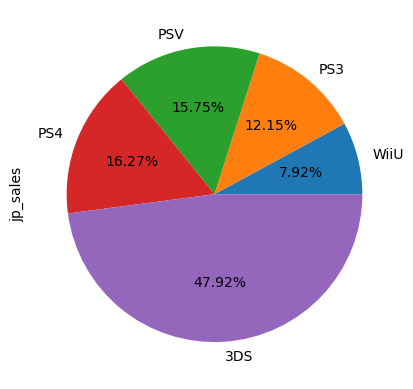

In [66]:
jp_platform_type['jp_sales'].plot.pie(autopct='%1.2f%%');

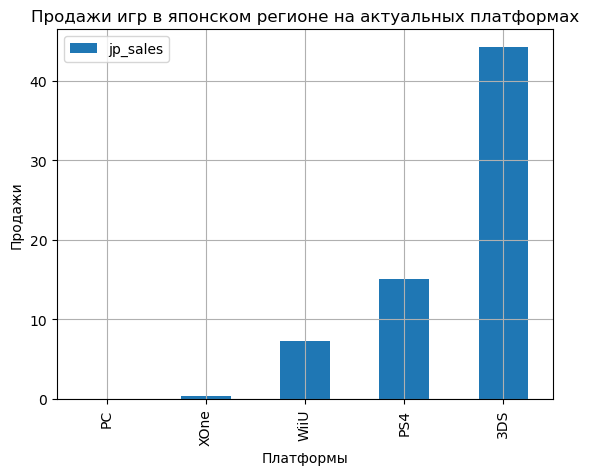

In [67]:
jp_platform_type_str = data_str.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
jp_platform_type_str.sort_values(by='jp_sales').plot(kind='bar', grid=True)
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр в японском регионе на актуальных платформах');

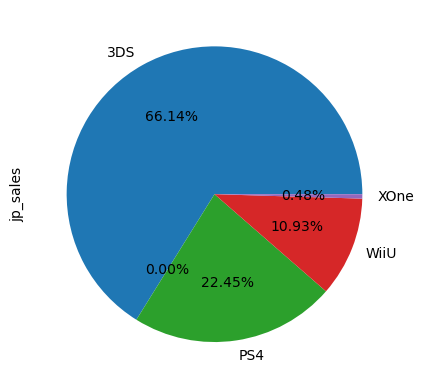

In [68]:
jp_platform_type_str['jp_sales'].plot.pie(autopct='%1.2f%%');

У японцев расклад совершенно иной - весь топ составляют консоли внутреннего рынка: почти половина - портативка 3DS, далее с трехкратным отставанием близкие друг к другу PS4 и PSV, а "старушка" PS3 опережает WiiU, замыкающую пятёрку лидеров. Среди актуальных платформ - 3DS занимает уже 2/3 рынка, PS4 на втором месте, WiiU на третьем, продажи XOne меньше половины процента, а игр на РС не покупают вообще.

### Топ-5 жанров в каждом регионе
Начнём с **североамериканского** региона:

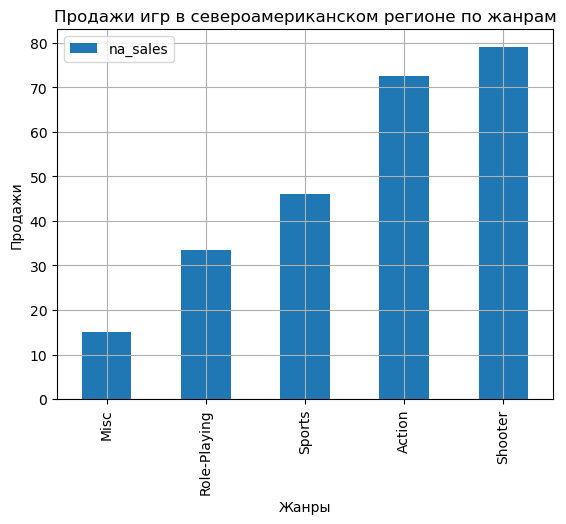

In [69]:
na_genre = data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales').tail()
na_genre.sort_values(by='na_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в североамериканском регионе по жанрам');

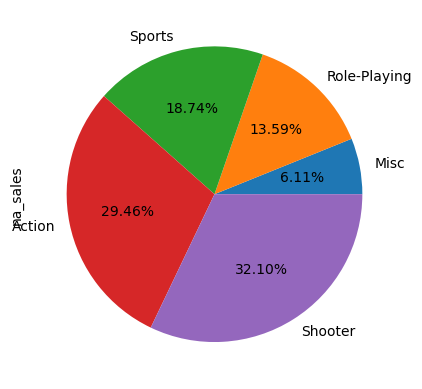

In [70]:
na_genre['na_sales'].plot.pie(autopct='%1.2f%%');

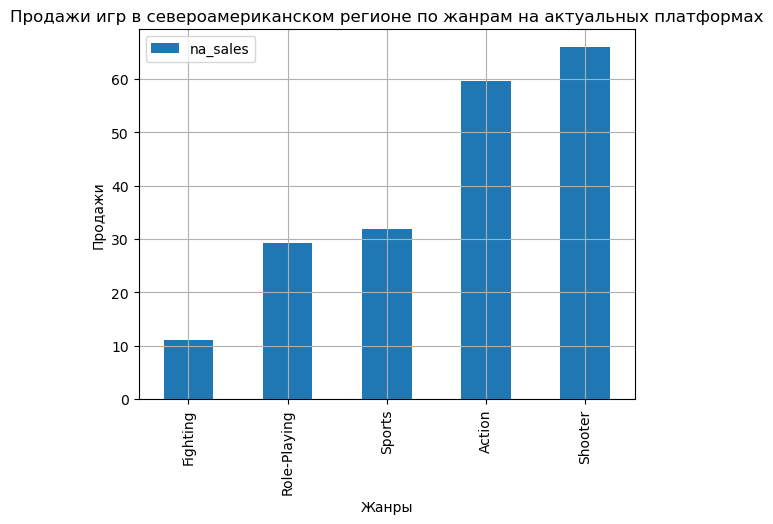

In [71]:
na_genre_str = data_str.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales').tail()
na_genre_str.sort_values(by='na_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в североамериканском регионе по жанрам на актуальных платформах');

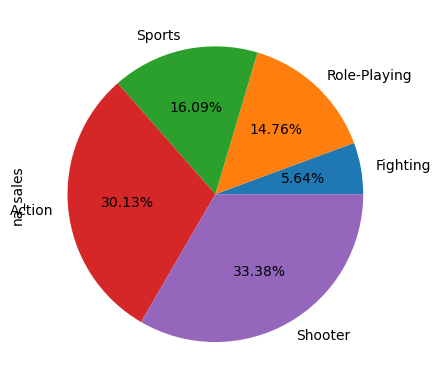

In [72]:
na_genre_str['na_sales'].plot.pie(autopct='%1.2f%%');

В Северной Америке больше всего любят шутеры и экшены, близки по значениям (3 и 4 места) - спортивные игры и ролевики, замыкают 5-ку лидеров Misc - "игры разных жанров" (весьма информативно). На актуальных платформах положение почти полностью повторяется, за исключением последнего места - платформеры.

**Европейский** рынок:

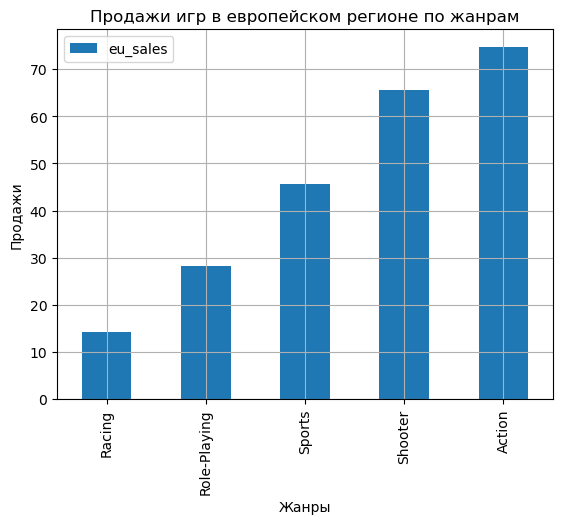

In [73]:
eu_genre = data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales').tail()
eu_genre.sort_values(by='eu_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в европейском регионе по жанрам');

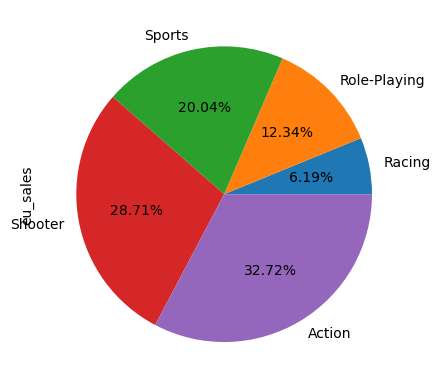

In [74]:
eu_genre['eu_sales'].plot.pie(autopct='%1.2f%%');

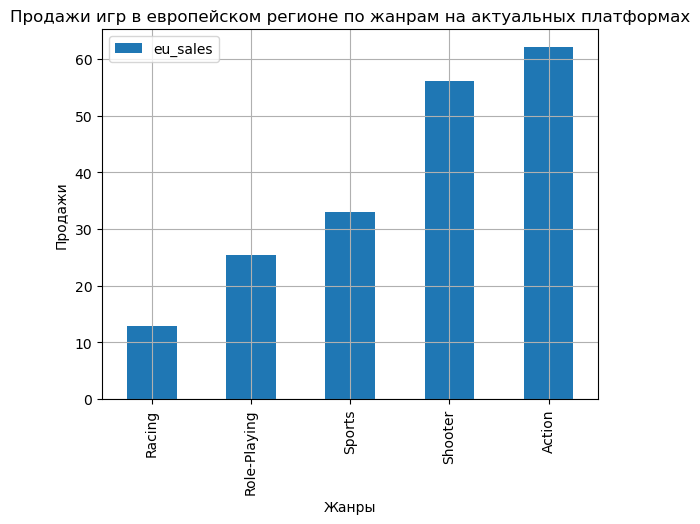

In [75]:
eu_genre_str = data_str.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales').tail()
eu_genre_str.sort_values(by='eu_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в европейском регионе по жанрам на актуальных платформах');

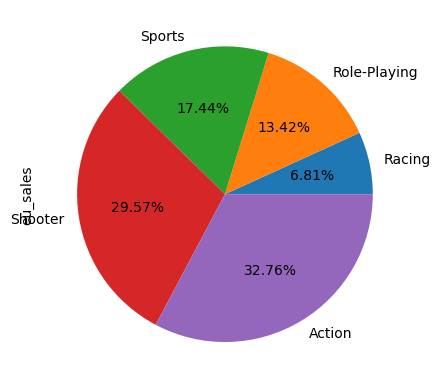

In [76]:
eu_genre_str['eu_sales'].plot.pie(autopct='%1.2f%%');

В Европе  топ-5 жанров похож на североамериканский, но экшены преобладаю над шутерами, на 3-м и 4-м местах также расположились спортивные игры и ролевики, а вот 5 место занимают гонки. На актуальных платформах ситуация идентичная.

**Японский** рынок:

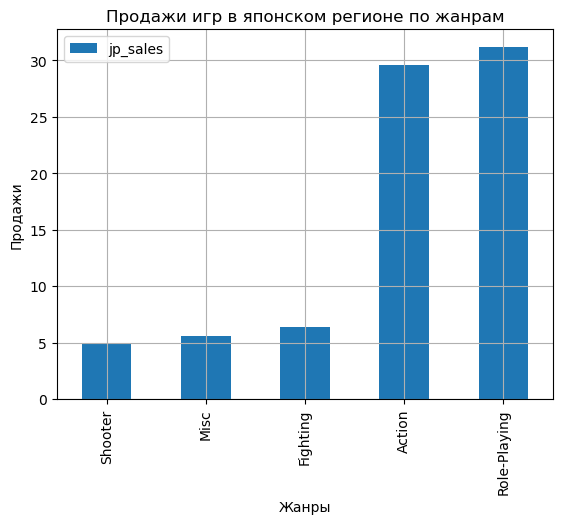

In [77]:
jp_genre = data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales').tail()
jp_genre.sort_values(by='jp_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в японском регионе по жанрам');

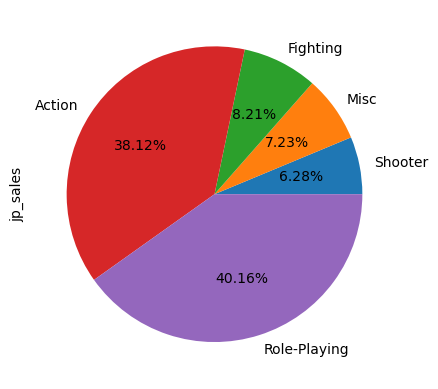

In [78]:
jp_genre['jp_sales'].plot.pie(autopct='%1.2f%%');

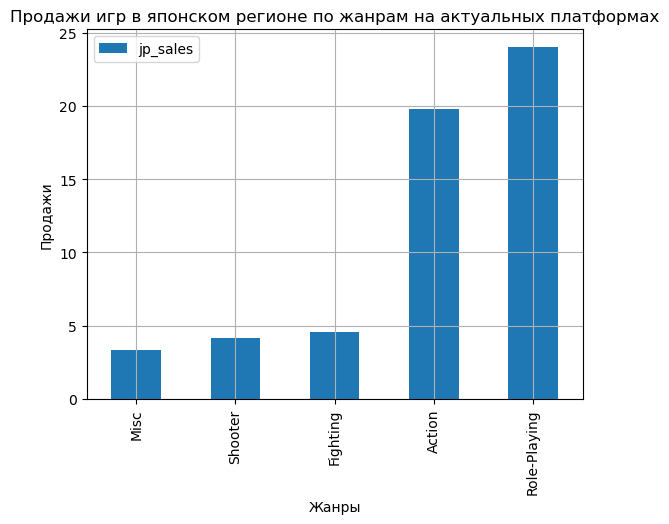

In [79]:
jp_genre_str = data_str.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales').tail()
jp_genre_str.sort_values(by='jp_sales').plot(kind='bar', grid=True)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.title('Продажи игр в японском регионе по жанрам на актуальных платформах');

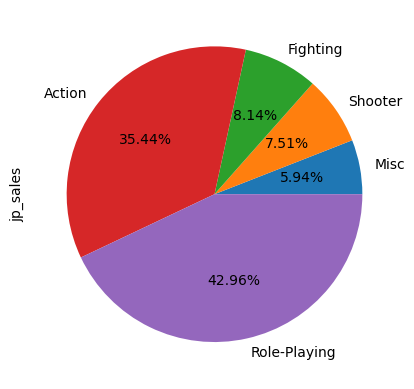

In [80]:
jp_genre_str['jp_sales'].plot.pie(autopct='%1.2f%%');

На японском рынке преобладают ролевики (бесконечные "зельды" и "финальные фантазии" с "покемонами" - у них даже есть отдельная категория JRPG - "японская ролевая игра"), экшены на 2-м месте, 3-е заняли файтинги, 4-е - "разные" (неудивительно, как мы увидели выше, Япония - самый "портативный" рынок), на 5-м месте шутеры. В современных консолях ситуация схожая - только 2 последних поменялись местами.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Посмотрим, что у нас с рейтинговой комиссией **Entertainment Software Rating Board**. Справедливости ради, стоит отметить, что оценки ESRB имеют смысл только для североамериканского рынка, т.к. эта негосударственная рейтинговая комиссия создана в США и Канаде, а у европейского рынка есть PEGI, японского -  CERO. И очень часто игры подвергаются цензуре и видоизменениям для каждого из рынков, а иногда и вообще выходят только на "домашнем" рынке. Но, т.к. в нашем датафрейме отутсвует страна-производитель игры, а оценка есть только ESRB, то и оценивать мы будем по ней:

In [81]:
esrb_type = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
esrb_type

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
RP,58.95,56.90,64.72
T,34.07,14.78,38.95


Вспомним, что обозначают имеющиеся значения:

- E - («Everyone») — «Для всех»
- M - («Mature») — «Для взрослых» (17+)
- T - («Teen») — «Подросткам» (13+)
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- RP - («Rating Pending») — «Рейтинг ожидается»

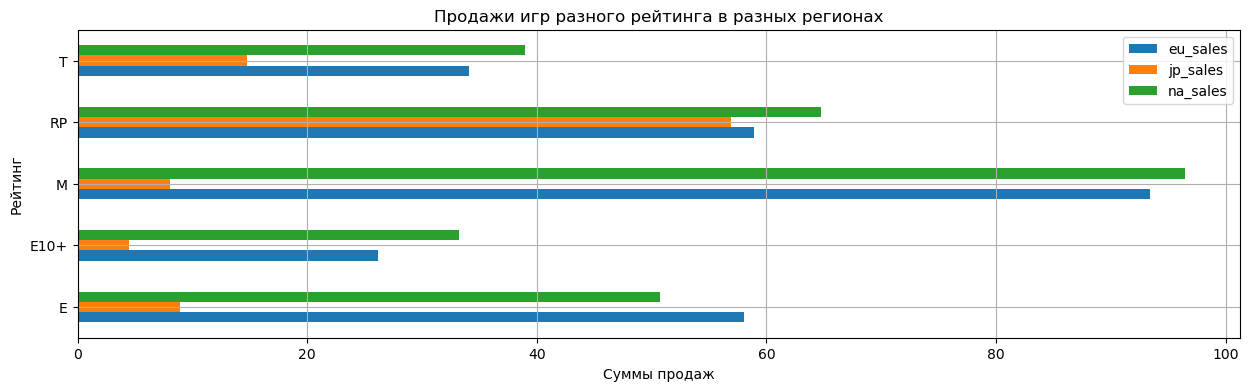

In [82]:
esrb_type.plot(kind='barh', figsize=(15, 4), grid=True)
plt.xlabel('Суммы продаж')
plt.ylabel('Рейтинг')
plt.title('Продажи игр разного рейтинга в разных регионах');

Североамериканский и европейский рынки имеют схожую картину:
- 1 место по продажам - игры с рейтингом М
- 2 - RP
- 3 - Е
- 4 - Т
- 5 - E10+

Японский рынок - у "самураев" свой путь:
- 1 - RP
- 2 - T
- 3 - E
- 4 - М
- 5 - E10+

**ОБЩИЙ ВЫВОД** можно описать так:

Североамериканский игрок в большей степени предпочитает новые консоли (PS4 и XOne) и взрослые игры (шутеры и экшены), в меньшей степени - развлечения для всей семьи и игры соревновательных жанров на портативных и менее технологичных платформах.

Европейский игрок очень сильно похож на американского, он также любит "бегать и стрелять" на новых консолях, чуть в меньшей степени любит портативки и ПК, а платформерам предпочитает гонки (всё-таки формула-1, ралли и кузовные чемпионаты появились в Европе, а может это связано с тем, что в США право на управление автомобилем можно получить в более раннем возрасте)

Японский игрок больше всего любит консоли, произведённые в родной стране. Рынок ПК и XBox ему неинтересен, он любит сложные RPG, экшены и в основном то, что хорошо подходит для портативок. На первом месте у него игры, у которых нет маркировки ESRB - скорее всего, для внутреннего рынка Японии.

## Проверка гипотез

Нам необходимо проверить 2 гипотезы:

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Если значений в выборке много (30 и больше), то распределение настолько близко к нормальному, что можно было бы просто взять нормальное распределение без степеней свободы. На практике практически всегда используют t-распределение. Т.к. речь идёт о сравнении средних 2 схожих выборок, не зависящих друг от друга, мы можем использовать как двустороннюю, так и одностороннюю гипотезы. Но у нас нет чёткого вопроса - выше ли средние оценки Xbox, чем у РС, поэтому - двусторонняя:
- Нулевая гипотеза - средние пользовательские оценки одинаковые
- Альтернативная гипотеза: среднее пользовательские оценки отличаются

Проверять также будем на актуальных данных. У нас оставались пропуски в оценках, поэтому дополнительно отфильтруем:

In [83]:
data_xone = data_actual[(data_actual['platform'] == 'XOne') & (data_actual['user_score'].notna())]
data_pc = data_actual[(data_actual['platform'] == 'PC') & (data_actual['user_score'].notna())]

print(len(data_xone))
print(len(data_pc))

alpha = 0.05
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

165
122
p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


In [84]:
print(data_xone['user_score'].mean())
print(data_pc['user_score'].mean())

6.594545454545456
6.298360655737705


За наш актуальный период (2014-2016 гг) оценки есть у 165 игр на Xbox One и 122 на РС - и средние их очень близки. Как близки сами по себе эти платформы ("майкрософтовский бокс" технологически близок к ПК).

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Здесь мы также можем использовать двусторонюю гипотезу для сравнения 2 независимых друг от друга выборок:
- Нулевая гипотеза - средние пользовательские оценки одинаковые
- Альтернативная гипотеза: среднее пользовательские оценки отличаются

In [85]:
data_action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'].notna())]
data_sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'].notna())]
print(len(data_action))
print(len(data_sports))

alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

297
127
p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем, значит, различия существенные. Посмотрим в цифрах:

In [86]:
print(data_action['user_score'].describe())
print()
print(data_sports['user_score'].describe()) 

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64


Действительно, отличаются не только средние, но и медианные, да и с минимальными и максимальными у экшенов всё лучше. Логично переформулировать альтернативную гипотезу и использовать односторонюю гипотезу:

In [87]:
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Cредние пользовательские оценки экшенов больше, чем спортивных игр')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.4355573992552932e-19
Cредние пользовательские оценки экшенов больше, чем спортивных игр


Проверим себя на гистограмме:

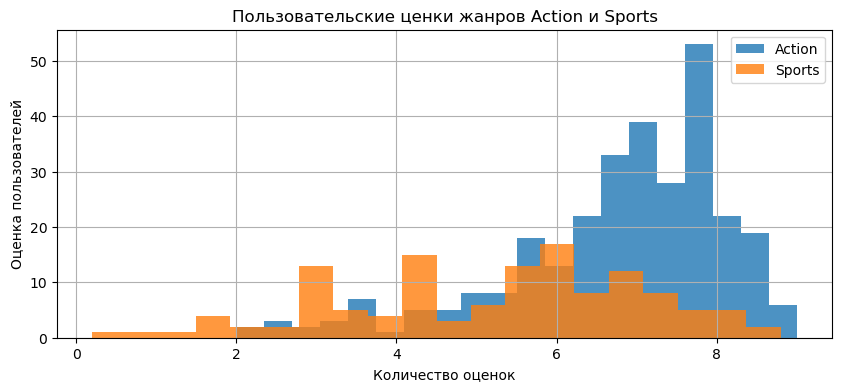

In [88]:
plt.subplots(figsize=(10, 4))
plt.hist(data_action['user_score'], label="Action", bins=10*2, alpha=0.8)
plt.hist(data_sports['user_score'], label="Sports", bins=10*2, alpha=0.8)
plt.title('Пользовательские ценки жанров Action и Sports')
plt.xlabel('Количество оценок')
plt.ylabel('Оценка пользователей')
plt.legend()
plt.grid();

Мало того, что экшенов за рассматриваемый период на актуальных платформах вышло в 2,3 раза больше (самый популярный жанр, как мы помним), так еще и пользователям этот жанр нравится больше (видим, что основная масса оценок выше 6,3, да еще и пик в районе 7,6-7,9). В 3 наших крупных рынках экшены стабильно на 1-2 местах, значит игровые студии тоже проводили схожий анализ и давно используют его при создании игр. А мы будем использовать в продаже.

## Вывод

Мы провели анализ рынка видоигр на основе данных с 1980-го по 2016-й год (последний не полный) для определения перспектив продажи на будущие периоды (2017-й год) для магазина "Стримчик". С данными проведена работа по очистке от дубликатов и заполнению пропущенных значений, там где это необходимо, актуализации некоторых данных с использованием сторонней информации (по рейтинговвым агенствам и оценкам). Были рассмотрены вопросы: сколько игры выходило в разные годы и почему; как менялись продажи по платформам; сроки жизни платформ. Для анализа был выбран период за последние 3 года (2014-2016), т.к. это оптимальный срок для такого быстроменяющегося рынка как видеигры, плюс на этот период выпало появление и развитие новых поколений платформ и завершение жизненного цикла предыдущих.

На конец 2016 года выделяются топ-5 актуальных платформ: Sony PlayStation 4, Microsoft XBox One, Nintendo WiiU, Nintendo 3 DS, PC, причём в 2016-м году вышли PlayStation 4 Pro и XBox One S, подтвердив свою актуальность (возможно, упор на её разработку и предопределил низкие показатели портативной Vita, которая и так не пользовалась особой популярностью). Прошлые поколения (PS 3, XBox 360, Wii и DS) к 2013-2015 годам либо уже завершили свой жизненный цикл, либо стремительно потеряли популярность, а ПК нельзя исключать по причине того, что это "вечная" платформа, которая хоть и не имеет таких пиковых показателей популярности, как консоли, но живёт за счёт постоянных обновлений и периодических революций в технологиях.

Был рассмотрен вопрос как влияют оценки критиков и зрителей на продажи внутри нескольких популярных платформ.Оценки критиков влияют на продажи больше, чем оценки пользователей, но нельзя сказать, что влияние имеет решающий характер. Всё таки у большинства платформ есть свои эксклюзивы и любимые игроками серии игр, которые могут не выпускаться для конкурентов, а бывает и такое, что одни и те же игры имеют серьёзные различия на разных консолях.

Рассмотрено жанровое разнообразие, в котором можно выделить как стабильные, так и жанры, в которых периодически выходят хиты, способные принести прибыль в короткий промежуток времни, но быть не самыми стабильными в этом направлении. 

Среди крупных регионов есть свои отличия как в жанровом разнообразии, так и выборе платформ. Если в североамериканском и европейском регионах больше предпочитают стационарные консоли для игры в экшены, шутеры, спортивные игры и RPG, то Япония больше предпочитает портативный сегмент со своими "ролевиками", экшенами, платформерами и файтингами, а также рядом жанров, присущих именно портативным консолям.

При выборе игр на продажу по оценкам рейтинговых агенств - стоит обратить внимание, что ESRB имеет смысл в основном для североамериканского рынка, в Европе и Японии есть свои (PEGI и CERO, соответственно) со своими критериями оценок и региональной разницей в играх (в Европе жестокость игр оценивается более серьёзно).

При этом проверка гипотез показала, что в рассматриваемом периоде оценка пользователей может не зависеть от платформы, но при этом может зависеть от жанра, и желательно проводить такие проверки для прогноза возможной будующей прибыли с акцентом на региональные особенности конкретного рынка.

Если выделять перспективы, то: 

- больший упор на **североамериканском рынке** стоит сделать на текщие и обновлённые консоли Sony (PS 4 и PS4 Pro), Microsoft (XBox One, XBox One S и ожидаемую XBox One X), и портативную  Nintendo 3DS с шутерами, экшенами и спортивными играми с взрослым и семейным рейтингом;
- на **европейском рынке** ситуация схожая, но портативки там могут уступить место ПК (единственный рынок, где он входит в топ-5 платформ)
- **японский рынок** наоборот, делает упор на только на консоли, причём "домашнего" региона (Nintendo 3DS и WiiU, Sony PS 4 и PS4 Pro) с RPG, экшенами и файтингами.